In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("smart_grid_stability_augmented.csv")
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    60000 non-null  float64
 1   tau2    60000 non-null  float64
 2   tau3    60000 non-null  float64
 3   tau4    60000 non-null  float64
 4   p1      60000 non-null  float64
 5   p2      60000 non-null  float64
 6   p3      60000 non-null  float64
 7   p4      60000 non-null  float64
 8   g1      60000 non-null  float64
 9   g2      60000 non-null  float64
 10  g3      60000 non-null  float64
 11  g4      60000 non-null  float64
 12  stab    60000 non-null  float64
 13  stabf   60000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 6.4+ MB


In [4]:
df.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,5.250000,5.250001,5.250001,5.250001,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000,0.015731
std,2.742434,2.742437,2.742437,2.742437,0.752129,0.433017,0.433017,0.433017,0.274244,0.274243,0.274243,0.274243,0.036917
min,0.500793,0.500141,0.500141,0.500141,1.582590,-1.999945,-1.999945,-1.999945,0.050009,0.050028,0.050028,0.050028,-0.080760
25%,2.874892,2.875011,2.875011,2.875011,3.218300,-1.624997,-1.624997,-1.624997,0.287521,0.287497,0.287497,0.287497,-0.015557
50%,5.250004,5.249981,5.249981,5.249981,3.751025,-1.249996,-1.249996,-1.249996,0.525009,0.525007,0.525007,0.525007,0.017142
75%,7.624690,7.624896,7.624896,7.624896,4.282420,-0.874993,-0.874993,-0.874993,0.762435,0.762490,0.762490,0.762490,0.044878
max,9.999469,9.999837,9.999837,9.999837,5.864418,-0.500025,-0.500025,-0.500025,0.999937,0.999982,0.999982,0.999982,0.109403


In [5]:
map1={'unstable':0,'stable':1}
df['stabf']=df['stabf'].replace(map1)
df=df.sample(frac=1)
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
55814,7.022577,5.818769,7.995880,1.232121,4.413685,-0.923056,-1.928885,-1.561744,0.092858,0.668738,0.999697,0.108928,0.041062,0
58625,5.280020,8.280635,0.543933,5.802766,4.036524,-1.238341,-1.990423,-0.807760,0.669598,0.858715,0.712885,0.469373,0.027698,0
56039,9.568972,0.732851,8.795044,9.421741,4.082692,-0.566627,-1.861903,-1.654163,0.914798,0.217123,0.556697,0.173896,0.037633,0
42554,9.403587,9.824097,1.823075,0.978378,4.812218,-1.685333,-1.377949,-1.748936,0.912489,0.845350,0.313419,0.678016,0.023094,0
6678,2.891402,6.002802,5.074182,3.357298,3.479255,-0.894718,-1.684979,-0.899557,0.549572,0.347794,0.576248,0.295111,0.010132,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60000 entries, 55814 to 57620
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    60000 non-null  float64
 1   tau2    60000 non-null  float64
 2   tau3    60000 non-null  float64
 3   tau4    60000 non-null  float64
 4   p1      60000 non-null  float64
 5   p2      60000 non-null  float64
 6   p3      60000 non-null  float64
 7   p4      60000 non-null  float64
 8   g1      60000 non-null  float64
 9   g2      60000 non-null  float64
 10  g3      60000 non-null  float64
 11  g4      60000 non-null  float64
 12  stab    60000 non-null  float64
 13  stabf   60000 non-null  int64  
dtypes: float64(13), int64(1)
memory usage: 6.9 MB


In [7]:
X=df.iloc[ : , :12]
y=df.iloc[ : , 12]

from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, shuffle=True,random_state=1)

In [8]:
X.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
55814,7.022577,5.818769,7.995880,1.232121,4.413685,-0.923056,-1.928885,-1.561744,0.092858,0.668738,0.999697,0.108928
58625,5.280020,8.280635,0.543933,5.802766,4.036524,-1.238341,-1.990423,-0.807760,0.669598,0.858715,0.712885,0.469373
56039,9.568972,0.732851,8.795044,9.421741,4.082692,-0.566627,-1.861903,-1.654163,0.914798,0.217123,0.556697,0.173896
42554,9.403587,9.824097,1.823075,0.978378,4.812218,-1.685333,-1.377949,-1.748936,0.912489,0.845350,0.313419,0.678016
6678,2.891402,6.002802,5.074182,3.357298,3.479255,-0.894718,-1.684979,-0.899557,0.549572,0.347794,0.576248,0.295111


In [9]:
y.head()

55814    0.041062
58625    0.027698
56039    0.037633
42554    0.023094
6678     0.010132
Name: stab, dtype: float64

In [14]:
y_pred=rg.predict(X_test)
y_pred

array([-0.02292131,  0.02393055, -0.04221756, ...,  0.00288387,
        0.04061719,  0.01166617])

In [15]:
from sklearn.linear_model import LinearRegression
rg=LinearRegression()
rg.fit(X_train,y_train)

LinearRegression()

Text(0, 0.5, 'predicted')

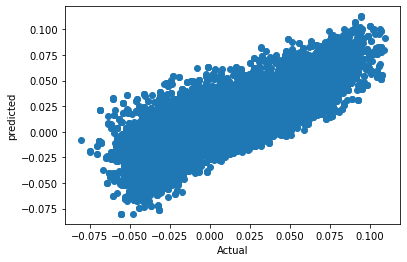

In [16]:
plt.scatter(y_test,y_pred);
plt.xlabel("Actual")
plt.ylabel("predicted")

<AxesSubplot:xlabel='stab'>

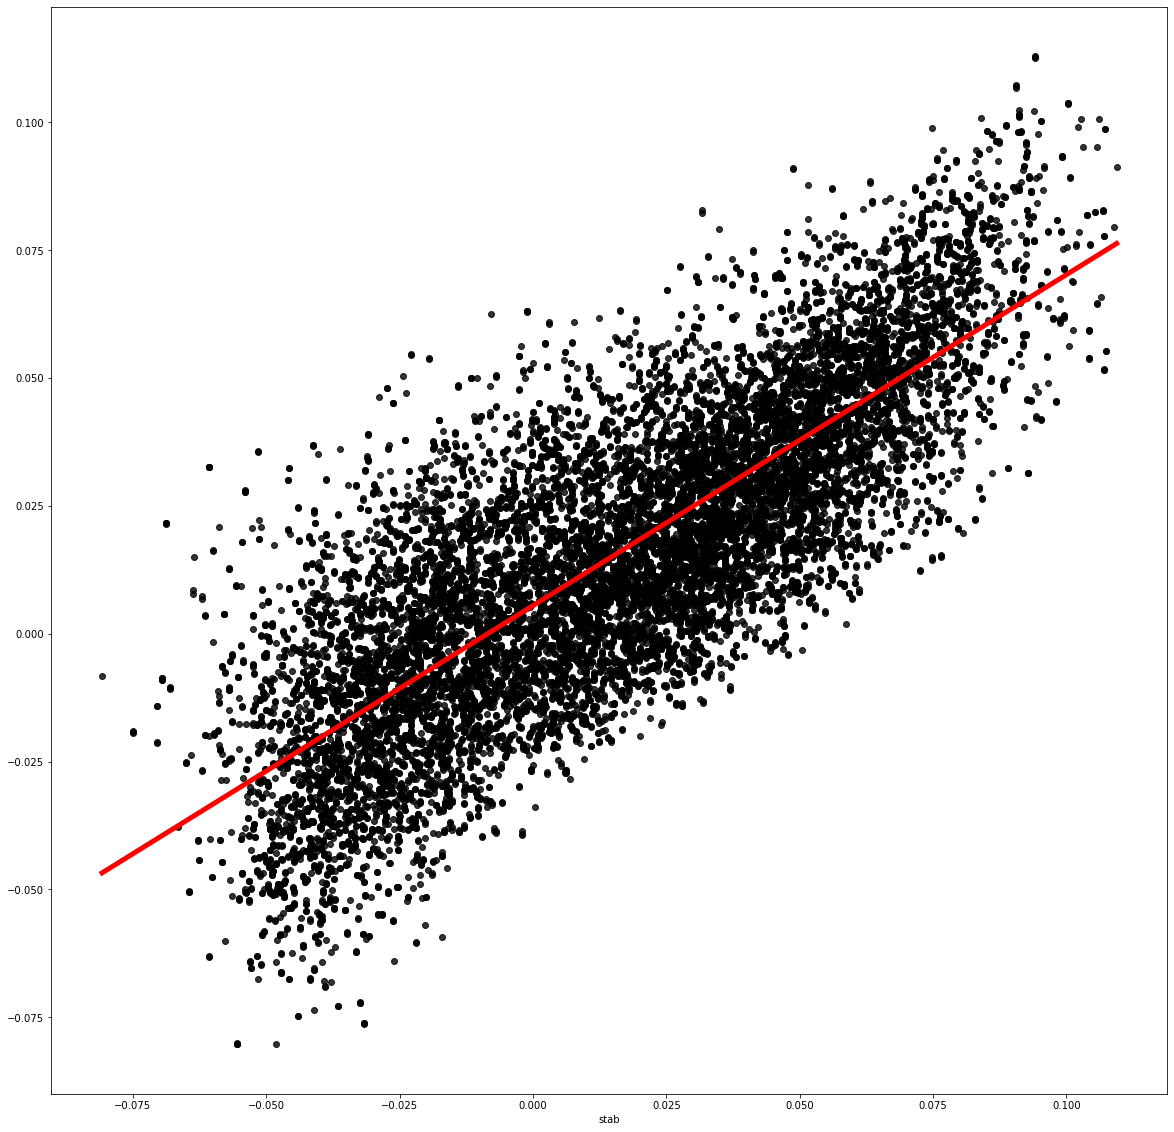

In [43]:
import seaborn as sns
fig=plt.gcf()
fig.set_size_inches(20,20)
sns.regplot(x=y_test,y=y_pred,ci=None,color='Black',line_kws={'color':'red','lw':5})


In [28]:
from sklearn.metrics import r2_score
Accuracy=r2_score(y_test,y_pred)*100
print(" Accuracy of the model is %.2f" %Accuracy)
# print("Regression Test R^2 Score: {:.5f}".format(rg.score(X_test, y_test)))

 Accuracy of the model is 64.68
